<a href="https://colab.research.google.com/github/pragati3635/mask-vs-no-mask-detection/blob/main/B19CSE075_B19CSE065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import PIL
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
w_Mask = []
wo_Mask = []
w_Mask_Test = []
wo_Mask_Test = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import shutil
w_Mask = []
count=0
dest_path = "/content/With_mask/"
destination_path = "/content/With_mask_Test/"
ptrn = "/content/drive/MyDrive/AFDB_masked_face_dataset/*/*"  
for img in glob.glob(ptrn):
    shutil.copy(img, dest_path)
    w_Mask.append(str(img))
for img in glob.glob(ptrn):
  if(count==5):
    break
  shutil.copy(img, destination_path)
  w_Mask_Test.append(str(img))
  count+=1    

In [ ]:
import glob 
import shutil
cnt = 0
count2=0
wo_Mask = []   
dest_path = "/content/Without_mask/"
destination_path = "/content/Without_mask_Test/"
ptrn = "/content/drive/MyDrive/AFDB_face_dataset/*/*"  
for img in glob.glob(ptrn):
  if (cnt == 5000):
      break
  shutil.copy(img, dest_path)
  wo_Mask.append(str(img))
  cnt += 1
for img in glob.glob(ptrn):
  if(count2==5):
    break
  shutil.copy(img, destination_path)
  wo_Mask_Test.append(str(img))
  count2+=1      

In [ ]:
def createdatabase(mask, no_mask):
  dBase = []
  label = []
  for path in mask:
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray_img,(64, 64), interpolation=cv2.INTER_CUBIC)
    dBase.append(resized.flatten())
    label.append(1)
    
  
  for path in no_mask:
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray_img,(64, 64), interpolation=cv2.INTER_CUBIC)
    dBase.append(resized.flatten())
    label.append(0)
  
  return dBase, label

mask_data, mask_lab = createdatabase(w_Mask, wo_Mask)
mask_data_test, mask_lab_test = createdatabase(w_Mask_Test, wo_Mask_Test)

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(mask_data)  
mask_dataset_Std = scaler.transform(mask_data) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
mask_dataset_lda = lda.fit_transform(mask_dataset_Std, mask_lab)


In [ ]:

 
mask_dataset_Std_test = scaler.transform(mask_data_test) 

mask_dataset_lda_test = lda.transform(mask_dataset_Std_test)


In [ ]:
from sklearn.utils import shuffle

def Shuffle(arr1, arr2):
  arr1_shuffled, arr2_shuffled = shuffle(arr1, arr2)
  return arr1_shuffled, arr2_shuffled
mask_dataset_shuffle, y = Shuffle(mask_data, mask_lab)  

x_train, x_test, y_train, y_test = tts(mask_dataset_shuffle, y, test_size=0.1, random_state=42)  

In [ ]:
mask_dataset_shuffle_lda, y_lda = Shuffle(mask_dataset_lda, mask_lab)  

x_train_lda, x_test_lda, y_train_lda, y_test_lda = tts(mask_dataset_shuffle_lda, y_lda, test_size=0.1, random_state=42)

In [ ]:
model = ["lr","MLP","GNB"]
model_accuracy = []
model_accuracy_with_std_data = []
model_f1_score = []
model_f1_score_with_std_data = []
model_cvs = []
model_cvs_with_std_data = []

Logistic Regression on non-standrdized data

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scores_lr = cross_val_score(lr, x_train, y_train, cv=5)
print("F1 score for non-standardize data from logistic regression :", f1_score(y_test, y_pred))
print("Accuracy for non-standardize data from logistic regression model: ", lr.score(x_test,y_test))
print("CVS for non-standardize data from logistic regression model: ",scores_lr.mean())


F1 score for non-standardize data from logistic regression : 0.7469879518072289
Accuracy for non-standardize data from logistic regression model:  0.8543689320388349
CVS for non-standardize data from logistic regression model:  0.8080852537194094


In [ ]:
model_accuracy.append(lr.score(x_test,y_test))
model_f1_score.append(f1_score(y_test, y_pred))
model_cvs.append(scores_lr.mean())

LogisticRegression on standardized data

In [ ]:
lr.fit(x_train_lda,y_train_lda)
y_pred_lda = lr.predict(x_test_lda)
scores_lr_stand = cross_val_score(lr, x_train_lda, y_train_lda, cv=5)
print("F1 score for standardize data from logistic regression :", f1_score(y_test_lda, y_pred_lda))
print("Accuracy for standardize data from logistic regression model: ", lr.score(x_test_lda,y_test_lda))
print("CVS for standardize data from logistic regression model: ",scores_lr_stand.mean())

F1 score for standardize data from logistic regression : 0.9661016949152542
Accuracy for standardize data from logistic regression model:  0.9778085991678225
CVS for standardize data from logistic regression model:  0.984264137563418


In [ ]:
lr_predict = lr.predict(mask_dataset_lda_test)

In [ ]:
model_accuracy_with_std_data.append(lr.score(x_test_lda,y_test_lda))
model_f1_score_with_std_data.append(f1_score(y_test_lda, y_pred_lda))
model_cvs_with_std_data.append(scores_lr_stand.mean())

MLP classifier on non standardized data

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=42, max_iter=987)
clf_mlp.fit(x_train, y_train)
y_pred_mlp=clf_mlp.predict(x_test)
scores_mlp = cross_val_score(clf_mlp, x_train, y_train, cv=5)
print("F1 score for non-standardize data from MLP :", f1_score(y_test, y_pred_mlp))
print("Accuracy for non-standardize data from MLP model: ", clf_mlp.score(x_test,y_test))
print("CVS for non-standardize data from MLP model: ",scores_mlp.mean())

F1 score for non-standardize data from MLP : 0.8648648648648648
Accuracy for non-standardize data from MLP model:  0.9237170596393898
CVS for non-standardize data from MLP model:  0.7880207887146977


In [ ]:
model_accuracy.append(clf_mlp.score(x_test,y_test))
model_f1_score.append(f1_score(y_test, y_pred_mlp))
model_cvs.append(scores_mlp.mean())

MLP classifier on standardized data

In [ ]:
clf_mlp.fit(x_train_lda, y_train_lda)
y_pred_mlp_lda=clf_mlp.predict(x_test_lda)
scores_mlp_stand = cross_val_score(clf_mlp, x_train_lda, y_train_lda, cv=5)
print("F1 score for standardize data from MLP :", f1_score(y_test_lda, y_pred_mlp_lda))
print("Accuracy for standardize data from MLP model: ", clf_mlp.score(x_test_lda,y_test_lda))
print("CVS for standardize data from MLP model: ",scores_mlp_stand.mean())

F1 score for standardize data from MLP : 0.9662447257383966
Accuracy for standardize data from MLP model:  0.9778085991678225
CVS for standardize data from MLP model:  0.9839556145711377


In [ ]:
clf_predict = clf_mlp.predict(mask_dataset_lda_test)

In [ ]:
model_accuracy_with_std_data.append(clf_mlp.score(x_test_lda,y_test_lda))
model_f1_score_with_std_data.append(f1_score(y_test_lda, y_pred_mlp_lda))
model_cvs_with_std_data.append(scores_mlp_stand.mean())

Gaussian Bayes Classifier on non standardized data

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb=gnb.predict(x_test)
scores_gnb = cross_val_score(gnb, x_train, y_train, cv=5)
print("F1 score for non-standardize data from GNB :", f1_score(y_test, y_pred_gnb))
print("Accuracy for non-standardize data from GNB model: ", gnb.score(x_test,y_test))
print("CVS for non-standardize data from GNB model: ",scores_gnb.mean())

F1 score for non-standardize data from GNB : 0.7336244541484717
Accuracy for non-standardize data from GNB model:  0.8307905686546463
CVS for non-standardize data from GNB model:  0.8247471610649457


In [ ]:
model_accuracy.append(gnb.score(x_test,y_test))
model_f1_score.append(f1_score(y_test, y_pred_gnb))
model_cvs.append(scores_gnb.mean())

Gaussian Bayes Classifier on standardized data

In [ ]:
gnb.fit(x_train_lda, y_train_lda)
y_pred_gnb_lda=gnb.predict(x_test_lda)
scores_gnb_stand = cross_val_score(gnb, x_train, y_train, cv=5)
print("F1 score for standardize data from GNB :", f1_score(y_test_lda, y_pred_gnb_lda))
print("Accuracy for standardize data from GNB model: ", gnb.score(x_test_lda,y_test_lda))
print("CVS for standardize data from MLP model: ",scores_gnb_stand.mean())

F1 score for standardize data from GNB : 0.9661016949152542
Accuracy for standardize data from GNB model:  0.9778085991678225
CVS for standardize data from MLP model:  0.8247471610649457


In [ ]:
gnb_predict = gnb.predict(mask_dataset_lda_test)

In [ ]:
model_accuracy_with_std_data.append(gnb.score(x_test_lda,y_test_lda))
model_f1_score_with_std_data.append(f1_score(y_test_lda, y_pred_gnb_lda))
model_cvs_with_std_data.append(scores_gnb_stand.mean())

Comparison

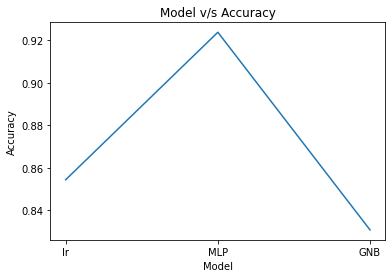

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_accuracy)
plt.title("Model v/s Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

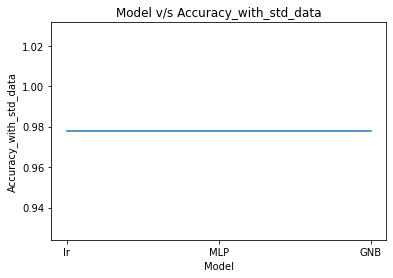

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_accuracy_with_std_data)
plt.title("Model v/s Accuracy_with_std_data")
plt.xlabel("Model")
plt.ylabel("Accuracy_with_std_data")
plt.show()

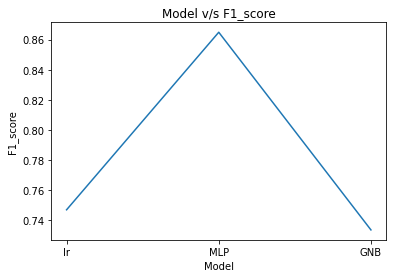

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_f1_score)
plt.title("Model v/s F1_score")
plt.xlabel("Model")
plt.ylabel("F1_score")
plt.show()

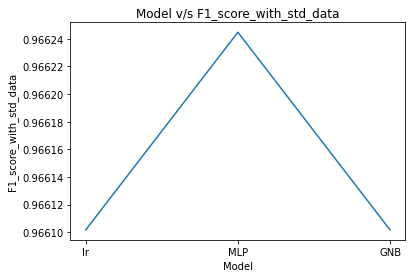

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_f1_score_with_std_data)
plt.title("Model v/s F1_score_with_std_data")
plt.xlabel("Model")
plt.ylabel("F1_score_with_std_data")
plt.show()

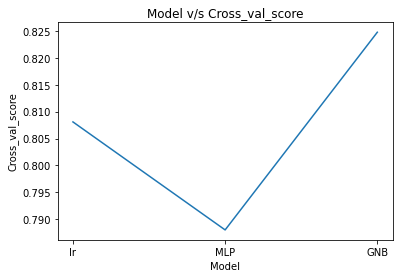

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_cvs)
plt.title("Model v/s Cross_val_score")
plt.xlabel("Model")
plt.ylabel("Cross_val_score")
plt.show()

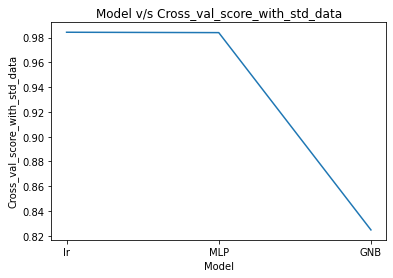

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model,model_cvs_with_std_data)
plt.title("Model v/s Cross_val_score_with_std_data")
plt.xlabel("Model")
plt.ylabel("Cross_val_score_with_std_data")
plt.show()

Test Cases

In [ ]:
lr_predict

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
clf_predict

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
gnb_predict

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
mask_lab_test

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]